This code will serve as simple examples for methods to convert time series to images.

In [1]:
#import the needed frameworks
import numpy as np
from scipy.signal import stft
import matplotlib.pyplot as plt 
import librosa
from librosa.feature import melspectrogram
import pywt
from pyts.image import GramianAngularField, MarkovTransitionField, RecurrencePlot

In [2]:
#function to plot the peak frequenz
def peak_frequency (spec,freq):
    peak_freqs = np.zeros(spec.shape[1])
    for i in range(spec.shape[1]):
        idx = np.argmax(spec[:, i])
        peak_freqs[i] = freq[idx] 
    return peak_freqs

Short-time Fourier transform

Text(0.5, 1.0, 'Peak frequence')

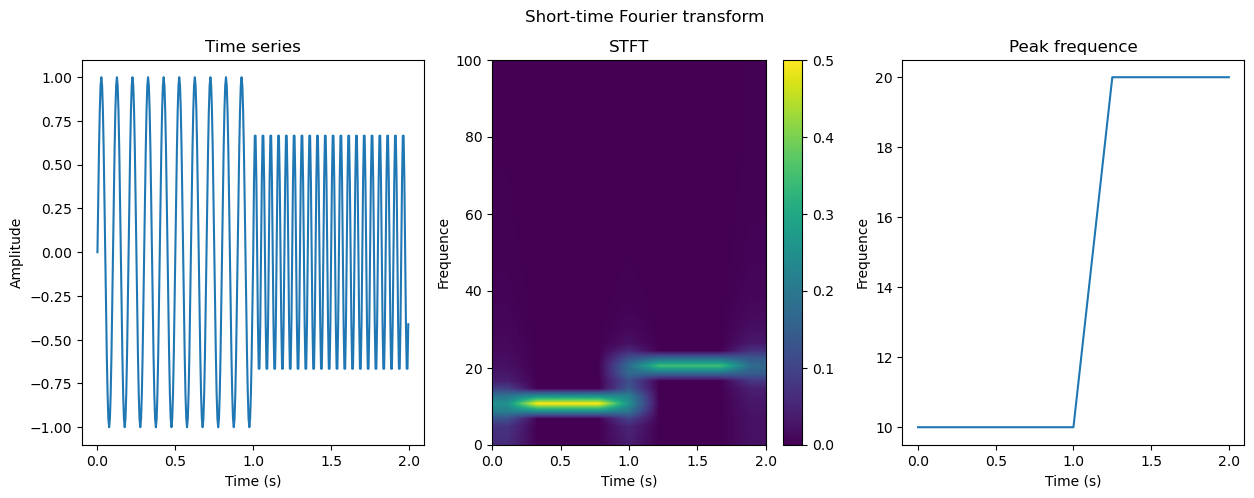

In [3]:
#create time series
#duration
T = 2

#sampling rate: sample per second
fs = 200

#number of samples:
N = fs * T

#sampling interval:
si = 1 / fs

#time series:
t = np.arange(0,T,si)
f1 = 10; f2 = 20
a1 = 1; a2 = 0.7
x1 = a1 * np.sin(2*np.pi*f1*t)
x2 = a2 * np.sin(2*np.pi*f2*t)
x = np.concatenate((x1[:len(t)//2],x2[len(t)//2:]))

#Short-time Fourier transform
window_size = fs // 2
hop_size = fs // 4
freq, time, STFT = stft (x,fs,nperseg=window_size,window="hann",noverlap=window_size-hop_size)
STFT = np.abs(STFT)
peak_freq = peak_frequency(STFT,freq)

#visulize
fig = plt.figure(figsize=(15,5))
fig.suptitle("Short-time Fourier transform")

plt.subplot(1,3,1)
plt.plot(t,x)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title("Time series")

plt.subplot(1,3,2)
plt.imshow(STFT,extent=[time.min(),time.max(), freq.min(), freq.max()],aspect="auto", interpolation="bilinear",origin='lower')
plt.ylabel('Frequence')
plt.xlabel('Time (s)')
plt.colorbar()
plt.title("STFT")

plt.subplot(1,3,3)
plt.plot(time,peak_freq)
plt.ylabel('Frequence')
plt.xlabel('Time (s)')
plt.title("Peak frequence")

Log Mel Spectrogram

/home/phamanh/anaconda3/envs/khoa/lib/python3.10/site-packages/librosa/feature/spectral.py:2157: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Text(0.5, 1.0, 'Peak frequence')

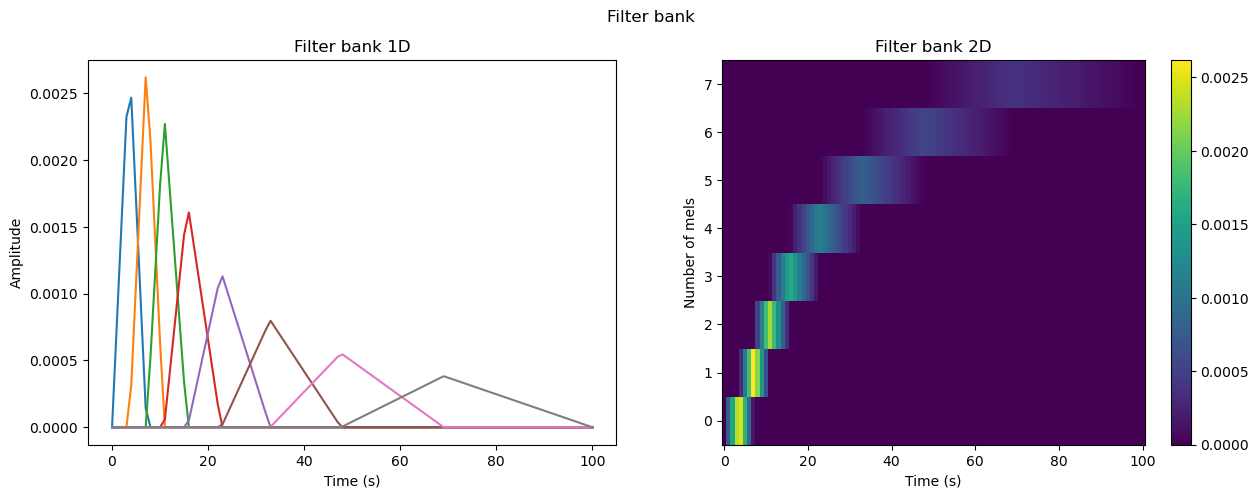

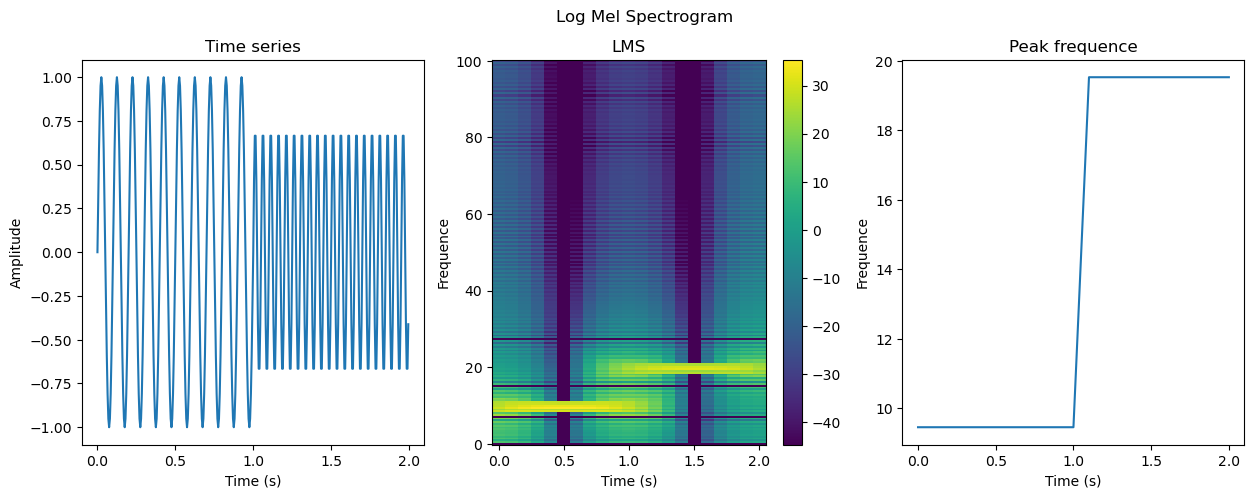

In [4]:
#create time series
#duration
T = 2

#sampling rate: sample per second
fs = 200

#number of samples:
N = fs * T

#sampling interval:
si = 1 / fs

#time series:
t = np.arange(0,T,si)
f1 = 10; f2 = 20
a1 = 1; a2 = 0.7
x1 = a1 * np.sin(2*np.pi*f1*t)
x2 = a2 * np.sin(2*np.pi*f2*t)
x = np.concatenate((x1[:len(t)//2],x2[len(t)//2:]))

#Short-time Fourier transform
window_size = fs // 1
hop_size = fs // 10
n_mels = 200
MS = melspectrogram (y=x,sr=fs,n_fft=window_size,hop_length=hop_size,n_mels=n_mels,htk = True,norm="slaney")
MS = np.abs(MS)
LMS = librosa.power_to_db(MS)
freq = librosa.mel_frequencies(n_mels=n_mels,fmin=0,fmax=fs / 2,htk=True)
filter_bank = librosa.filters.mel(sr=fs*100,n_fft = window_size,n_mels=8)
peak_freq = peak_frequency(MS,freq)

#visulize
fig = plt.figure(figsize=(15,5))
fig.suptitle("Filter bank")

plt.subplot(1,2,1)
freq_1 = np.linspace(freq.min(),freq.max(), filter_bank.shape[1])
for filter in filter_bank:    
    plt.plot(freq_1,filter)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title("Filter bank 1D")

plt.subplot(1,2,2)
plt.imshow(filter_bank,aspect="auto",origin='lower')
plt.ylabel('Number of mels')
plt.xlabel('Time (s)')
plt.colorbar()
plt.title("Filter bank 2D")

fig = plt.figure(figsize=(15,5))
fig.suptitle("Log Mel Spectrogram")

plt.subplot(1,3,1)
plt.plot(t,x)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title("Time series")

plt.subplot(1,3,2)
#plt.imshow(LMS,extent=[t.min(),T, freq.min(), freq.max()],aspect="auto", interpolation="bilinear",origin='lower')
plt.pcolormesh(np.linspace(0,T,LMS.shape[1]),freq,LMS,shading="auto")
plt.ylabel('Frequence')
plt.xlabel('Time (s)')
plt.colorbar()
plt.title("LMS")

plt.subplot(1,3,3)
time = np.linspace(t.min(),T, LMS.shape[1])
plt.plot(time,peak_freq)
plt.ylabel('Frequence')
plt.xlabel('Time (s)')
plt.title("Peak frequence")



Continuous Wavelet Transform

Text(0.5, 1.0, 'Peak frequence')

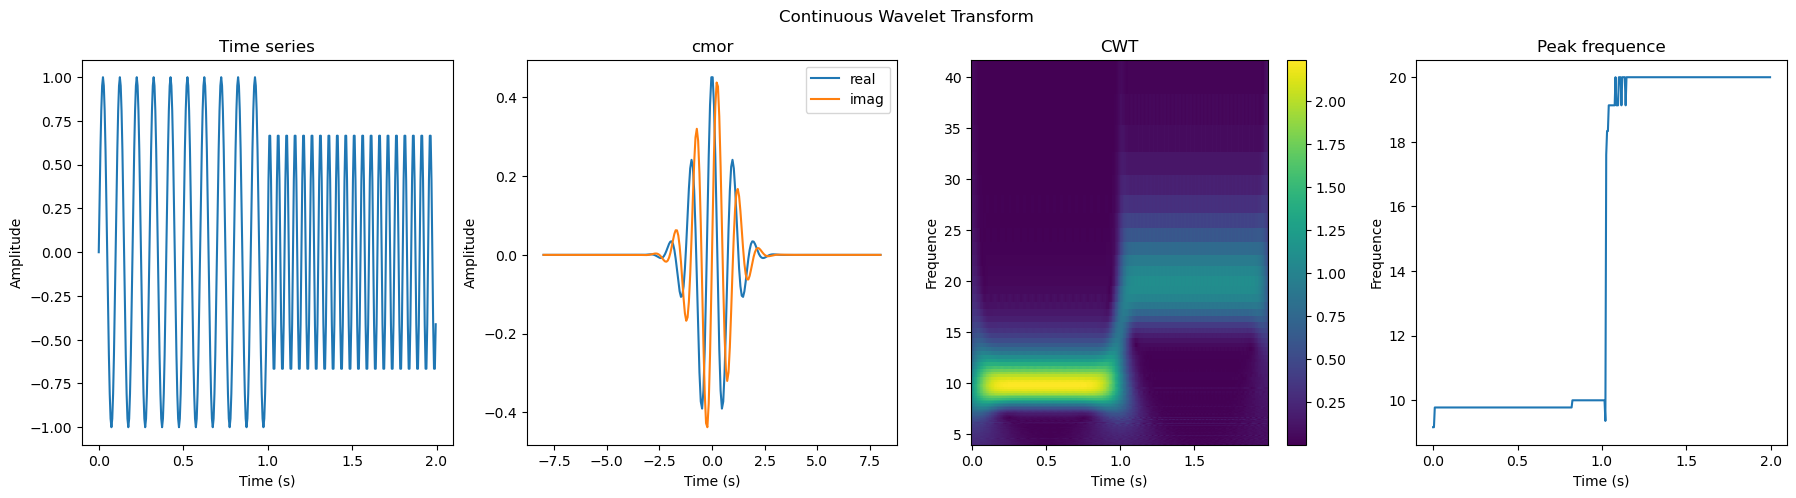

In [5]:
#create time series
#duration
T = 2

#sampling rate: sample per second
fs = 200

#number of samples:
N = fs * T

#sampling interval:
si = 1 / fs

#time series:
t = np.arange(0,T,si)
f1 = 10; f2 = 20
a1 = 1; a2 = 0.7
x1 = a1 * np.sin(2*np.pi*f1*t)
x2 = a2 * np.sin(2*np.pi*f2*t)
x = np.concatenate((x1[:len(t)//2],x2[len(t)//2:]))

#Short-time Fourier transform
B = 1.5
C = 1
wavelet_function = "cmor{}-{}".format(B,C)
wavelet = pywt.ContinuousWavelet(wavelet_function)
wavelet, time = wavelet.wavefun()

scale_min, scale_max, n_scales = 5,50,100
scales = np.linspace(scale_min,scale_max,n_scales)

cwt, freq = pywt.cwt(data=x,scales=scales,wavelet=wavelet_function,sampling_period=si)
cwt = np.abs(cwt)
peak_freq = peak_frequency(cwt,freq)

#visulize
fig = plt.figure(figsize=(22,5))
fig.suptitle("Continuous Wavelet Transform")

plt.subplot(1,4,1)
plt.plot(t,x)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title("Time series")

plt.subplot(1,4,2)
plt.plot(time,wavelet.real)
plt.plot(time,wavelet.imag)
plt.legend(["real","imag"])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title("cmor")

plt.subplot(1,4,3)
plt.pcolormesh(t,freq,cwt)
plt.ylabel('Frequence')
plt.xlabel('Time (s)')
plt.colorbar()
plt.title("CWT")

plt.subplot(1,4,4)
plt.plot(t,peak_freq)
plt.ylabel('Frequence')
plt.xlabel('Time (s)')
plt.title("Peak frequence")

Recurrence Plot

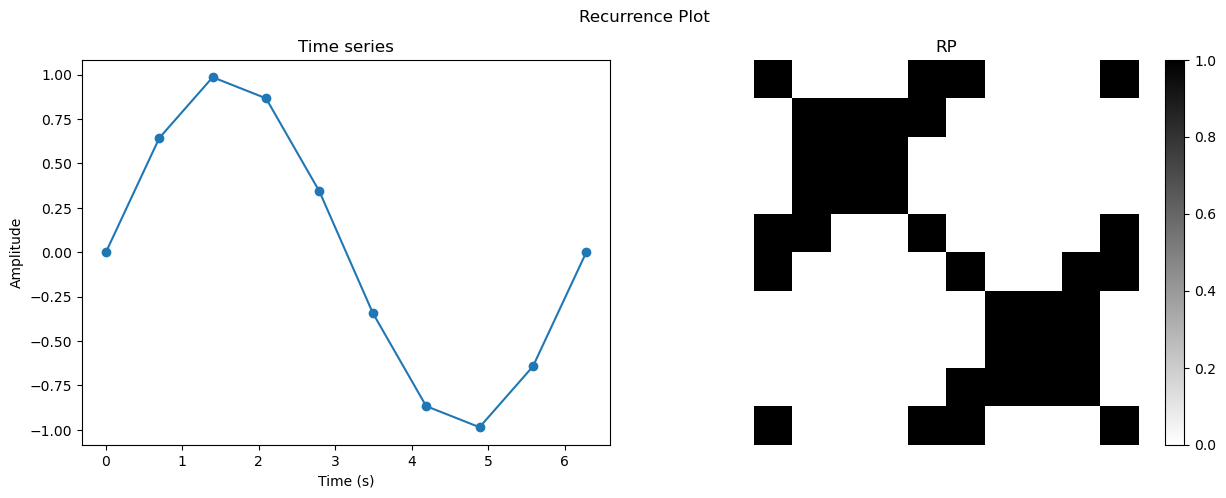

In [6]:
#create time series
#number of samples:
N = 10

#time series:
t = np.linspace(0,2*np.pi,N)
X = np.sin(t).reshape(1,-1)

#Recurrence Plot
threshold = 0.5
rp = RecurrencePlot(threshold=threshold)
RP = rp.fit_transform(X)

#visualize
fig = plt.figure(figsize=(15,5))
fig.suptitle("Recurrence Plot")

plt.subplot(1,2,1)
plt.plot(t,X.ravel(),"-o")
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title("Time series")

plt.subplot(1,2,2)
plt.imshow(RP.squeeze(), cmap="binary")
plt.axis("off")
plt.title("RP")
plt.colorbar()

Gramian Angular Field

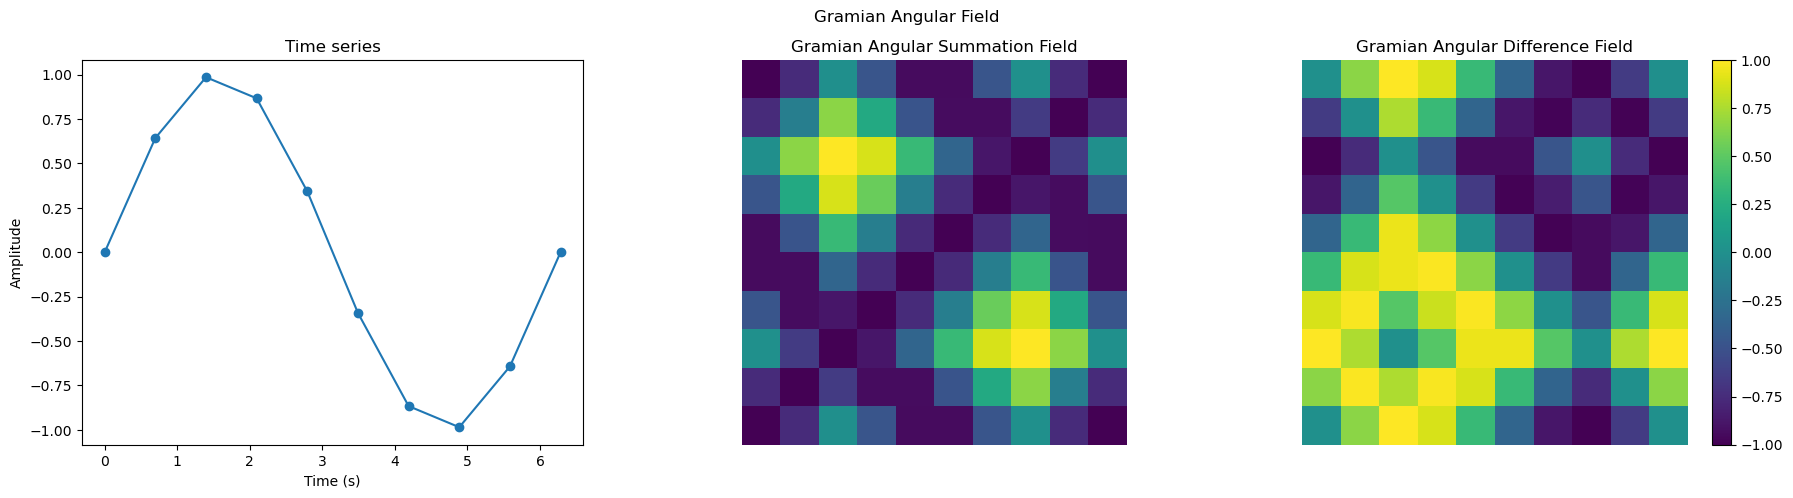

In [7]:
#create time series
#number of samples:
N = 10

#time series:
t = np.linspace(0,2*np.pi,N)
X = np.sin(t).reshape(1,-1)

#Gramian Angular Field
gasf = GramianAngularField(method="summation")
gadf = GramianAngularField(method="difference")

GASF = gasf.fit_transform(X)
GADF = gadf.fit_transform(X)

#visualize
fig = plt.figure(figsize=(22,5))
fig.suptitle("Gramian Angular Field")

plt.subplot(1,3,1)
plt.plot(t,X.ravel(),"-o")
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title("Time series")

plt.subplot(1,3,2)
plt.imshow(GASF.squeeze())
plt.axis("off")
plt.title("Gramian Angular Summation Field")

plt.subplot(1,3,3)
plt.imshow(GADF.squeeze())
plt.axis("off")
plt.title("Gramian Angular Difference Field")
plt.colorbar()

Markov Transition Field

n_bins: 3
print: <built-in function print>


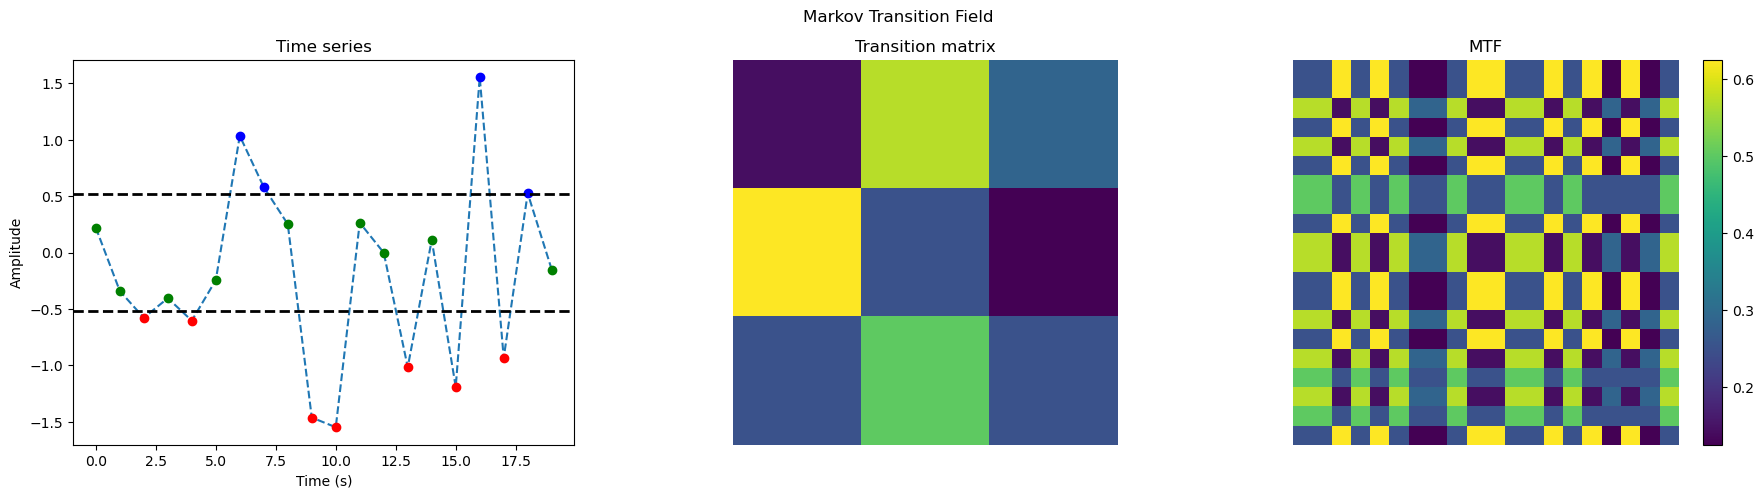

In [10]:
#create time series
#number of samples:
N = 20

#time series:
np.random.seed(19)
t = np.linspace(0,N-1,N)
X = np.random.randn(1,N)

#Markov Transition Field
n_bins = 3
print("n_bins:", n_bins)
print("print:", print)
strategy = "uniform"
mtf = MarkovTransitionField(n_bins=n_bins, strategy=strategy)
MTF = mtf.fit_transform(X)

#Transition matrix
def values_in_bins (X,n_bins):
    X = X.ravel()
    bins = np.linspace(X.min(), X.max(), n_bins+1)
    index_binned = []
    
    for index in range(len(bins)-1):
        lower = bins[index]
        upper = bins[index+1]
        x_in_interval = [i for i in range(len(X))
               if (index == 0 and lower <= X[i] <= upper)
               or (index > 0 and lower <= X[i] <= upper)]
        index_binned.append(x_in_interval)
    
    X = list(X)
    x_binned = []
    for x in X:
        for i in index_binned:
            if X.index(x) in i:
                x_binned.append(index_binned.index(i))
                
    return x_binned, bins

def transition_matrix(x_binned,n_bins):
    # calculate the probability from state row to state column
    tfm = np.zeros((n_bins,n_bins))
    for row in range(n_bins):
        for column in range(n_bins):
            i = 0
            for index in range(len(x_binned)-1):
                if x_binned[index] == row and x_binned[index+1] == column :
                    i = i + 1
                tfm[row][column] = i
    sum_tmp = np.sum(tfm, axis=1)
    for row in range(len(tfm)):
        if sum_tmp[row] != 0:
            tfm[row] = tfm[row] / sum_tmp [row]
        else:
            tfm[row] = 0
    return tfm


x_binned, bins = values_in_bins(X=X,n_bins=n_bins)
tm = transition_matrix(x_binned=x_binned,n_bins=n_bins)


#visualize
fig = plt.figure(figsize=(22,5))
fig.suptitle("Markov Transition Field")

plt.subplot(1,3,1)
plt.plot(t,X.ravel(),"--")
color = ["red","green","blue","violet","black","orange","yelow"]
for i in range(len(x_binned)):
    plt.plot(t[i],X.ravel()[i],"o",color= color[x_binned[i]])
for i in range(len(bins)-2):
    plt.axhline(y=bins[i+1],color="black", linestyle='--', linewidth=2)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title("Time series")

plt.subplot(1,3,2)
plt.imshow(tm)
plt.axis("off")
plt.title("Transition matrix")

plt.subplot(1,3,3)
plt.imshow(MTF.squeeze())
plt.axis("off")
plt.title("MTF")
plt.colorbar()